In [1]:
import torch
import torchvision

In [2]:
transforms = torchvision.transforms.ToTensor()
train_dataset = torchvision.datasets.ImageFolder('../data/dice/train', transform=transforms)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True
)

class_from_idx = {v: k for k, v in train_dataset.class_to_idx.items()}
n_classes = len(class_from_idx)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # np.transpose(npimg, (1, 2, 0))
    plt.show()

def show_batch(images, targets):
    for image, t in zip(images, targets.tolist()):
        imshow(image)
        print(class_from_idx[t])

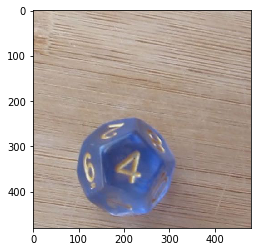

d12


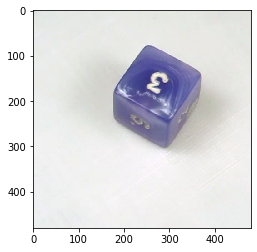

d6


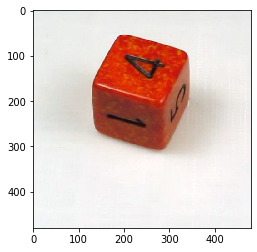

d6


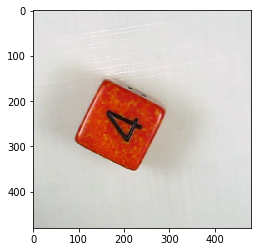

d6


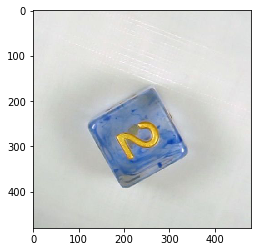

d6


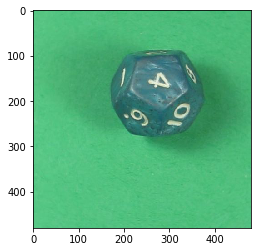

d12


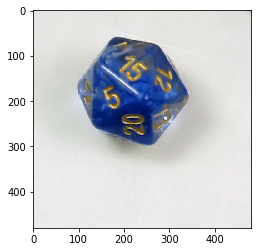

d20


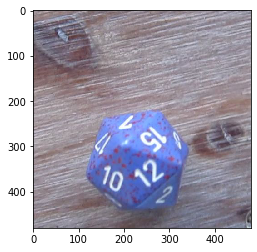

d20


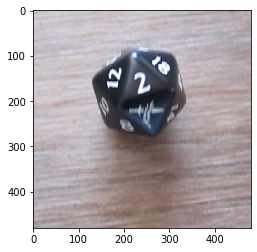

d20


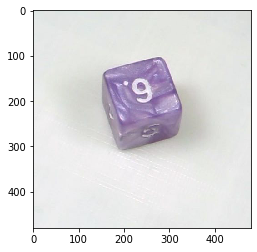

d6


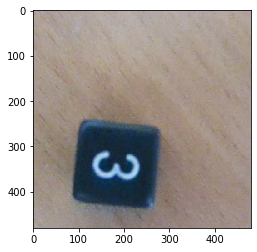

d6


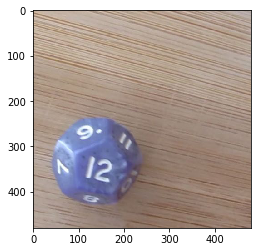

d12


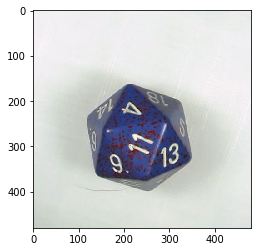

d20


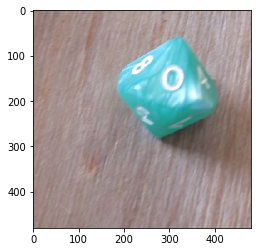

d10


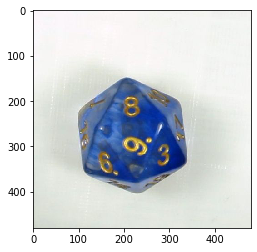

d20


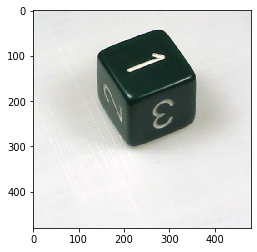

d6


In [4]:
for batch_index, (input_batch, label_batch) in enumerate(train_dataloader):
    show_batch(input_batch, label_batch)
    break

In [5]:
import torch.nn as nn


class AmyNet(nn.Module):
    def __init__(self):
        super(AmyNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 7)
        self.pool2 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(12, 24, 4)
        self.conv3 = nn.Conv2d(24, 48, 6)
        self.conv4 = nn.Conv2d(48, 24, 2, stride=2)
        self.conv5 = nn.Conv2d(24, 6, 4, stride=2)
        self.pool13 = nn.MaxPool2d(13)
        

    def forward(self, x):
        x = torch.tanh(self.conv1(x))  # (_, 12, 474, 474)
        x = self.pool2(x)  # (_, 12, 237, 237)
        x = torch.tanh(self.conv2(x))  # (_, 24, 234, 234)
        x = self.pool2(x)  # (_, 24, 117, 117)
        x = torch.tanh(self.conv3(x))  # (_, 48, 112, 112)
        x = self.pool2(x)  # (_, 48, 56, 56)
        x = torch.tanh(self.conv4(x))  # (_, 24, 28, 28)
        x = torch.tanh(self.conv5(x))  # (_, 6, 13, 13)
        x = torch.squeeze(self.pool13(x))  # (_, 6, 1, 1)
        
        return x


model = AmyNet()

In [6]:
model

AmyNet(
  (conv1): Conv2d(3, 12, kernel_size=(7, 7), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 24, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(24, 48, kernel_size=(6, 6), stride=(1, 1))
  (conv4): Conv2d(48, 24, kernel_size=(2, 2), stride=(2, 2))
  (conv5): Conv2d(24, 6, kernel_size=(4, 4), stride=(2, 2))
  (pool13): MaxPool2d(kernel_size=13, stride=13, padding=0, dilation=1, ceil_mode=False)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
from datetime import datetime

for epoch in [2]:
    start_time = datetime.now()

    running_loss = 0.0
    for batch_index, (inputs, labels) in enumerate(train_dataloader):
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_index % 100 == 99:
            print(f'[{epoch + 1}, {batch_index + 1}] loss: {running_loss / 100})')
            running_loss = 0.0

    elapsed_time = datetime.now() - start_time
    print(f'Epoch {epoch + 1} complete after {elapsed_time.seconds} seconds')

    torch.save(model.state_dict(), f'../saved_weights/amy_net_v2_epoch{epoch + 1}.pth')


[3, 100] loss: 1.468921298980713)
[3, 200] loss: 1.4446589064598083)
[3, 300] loss: 1.4495168375968932)
[3, 400] loss: 1.474806283712387)
[3, 500] loss: 1.4194216430187225)
[3, 600] loss: 1.4203575909137727)
[3, 700] loss: 1.4443320870399474)
[3, 800] loss: 1.4055305600166321)
